# Urbanity and Consumption-based Environmental Impacts

author: Joao Meirelles

date: 24/05/2019

## Objetive

this work intend to understand how urban living modulate consumption-based environemntal impact.

we will use WB household expenditure data:  http://datatopics.worldbank.org/consumption/

In [2]:
# import libraries

import pymrio
import pandas as pd
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import seaborn
import pycountry


%matplotlib inline

### Data import

I had extracted household expenditure data from the WB database. 

Data was originally extracted in PPP for all the countries. 

In [42]:
WBconsumption = pd.read_csv('WBexpenditure_240519.csv')
WBconsumption.head(15)

,Unnamed: 0,Unnamed: 1,country_code,country,sector,urbanity,all,lowest,low,middle,higher
0,country,0,AFG,Afghanistan,Alsectors,rural,1148.27,847.56,1625.97,3970.46,NaN
1,country,1,AFG,Afghanistan,Foodandbeverages,rural,737.74,571.16,1005.54,1870.94,NaN
2,country,2,AFG,Afghanistan,Clothingandfootwear,rural,51.72,43.24,65.22,126.92,NaN
3,country,3,AFG,Afghanistan,Housing,rural,56.99,41.01,82.74,159.13,NaN
4,country,4,AFG,Afghanistan,Energy,rural,70.08,49.84,102.41,237.52,NaN
5,country,5,AFG,Afghanistan,Transport,rural,59.79,31.81,102.58,545.63,NaN
6,country,6,AFG,Afghanistan,Water,rural,0.62,0.33,1.11,0.11,NaN
7,country,7,AFG,Afghanistan,Educationsector,rural,0.56,0.39,0.84,2.15,NaN
8,country,8,AFG,Afghanistan,Health,rural,45.27,34.00,63.51,103.94,NaN
9,country,9,AFG,Afghanistan,ICT,rural,11.28,6.88,18.03,83.34,NaN


# Analysis

#### Expenditure

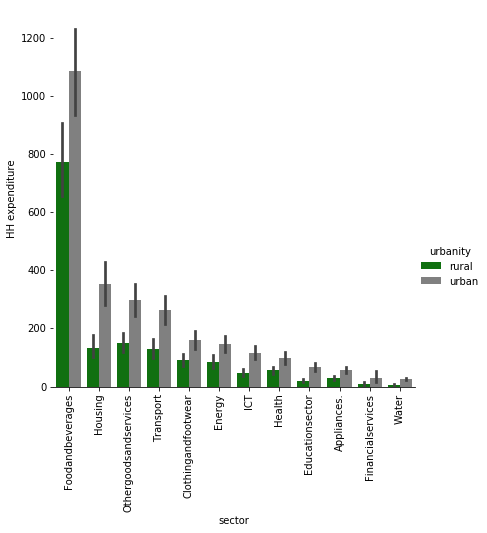

In [43]:
# barplot
g = sns.catplot(x="sector", y="all", hue="urbanity", data=WBconsumption.loc[WBconsumption['sector'] != 'Alsectors'],
                height=6, kind="bar", palette=["green", "grey"], 
                order=['Foodandbeverages','Housing','Othergoodsandservices','Transport','Clothingandfootwear',
                      'Energy','ICT','Health','Educationsector','Appliances.','Financialservices','Water'])
g.despine(left=True)
g.set_ylabels("HH expenditure")
g.set_xticklabels(rotation=90)


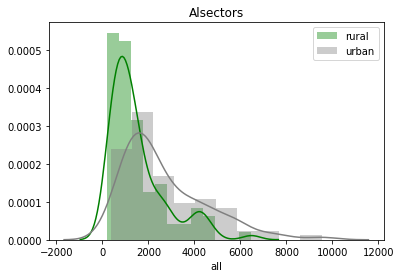

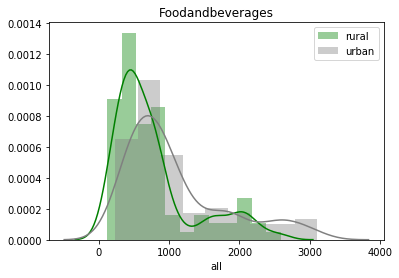

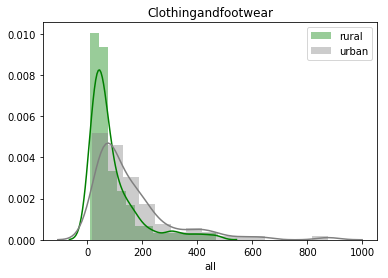

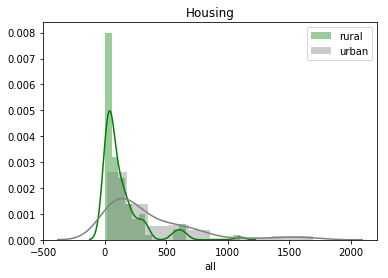

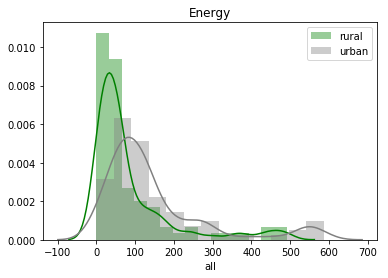

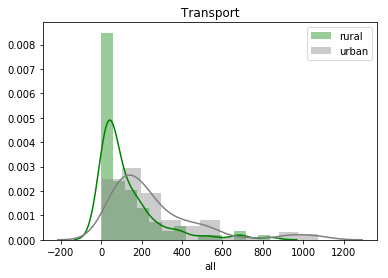

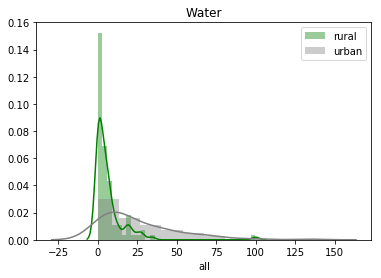

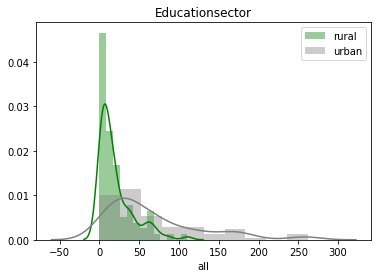

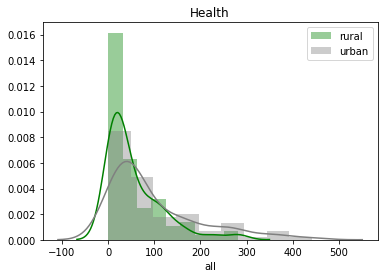

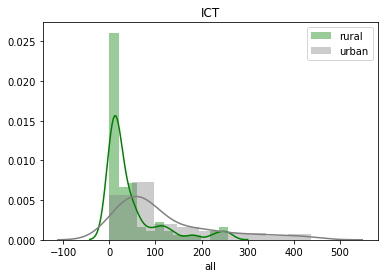

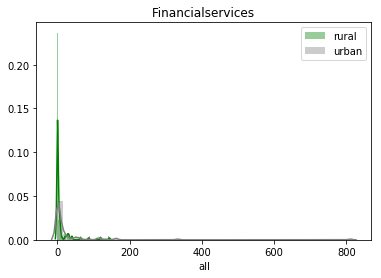

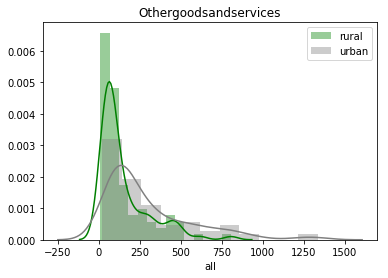

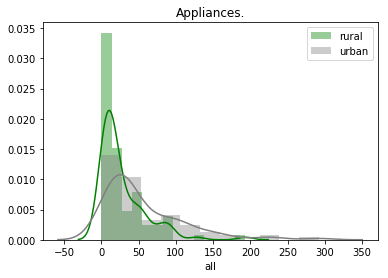

In [29]:
# probability distribution
sectors = WBconsumption['sector'].unique()

for s in sectors:
    sns.distplot( WBconsumption.loc[(WBconsumption['sector'] == s) & (WBconsumption['urbanity'] == 'rural')]['all'] , color="green", label="rural")
    sns.distplot( WBconsumption.loc[(WBconsumption['sector'] == s) & (WBconsumption['urbanity'] == 'urban')]['all'] , color="grey", label="urban")
    plt.legend()
    plt.title(s)
    plt.show()

#### Anomaly

In [44]:
c

'Afghanistan'

In [56]:
WBconsumption.loc[(WBconsumption['country'] == c) & (WBconsumption['sector'] == 'Alsectors') & (WBconsumption['urbanity'] == 'urban')]['all'].item()


932.62

In [71]:
gap_UtoR = pd.DataFrame(columns=['country','sector',
                                 'all_urban','all_rural',
                                 'all_gap_abs','all_gap_prc',
                                 'sector_urban','sector_rural',
                                 'sector_gap_abs','sector_gap_prc',
                                 'gap_UtoR_abs', 'gap_UtoR_prc'])

countries = WBconsumption['country'].unique()
sectors = WBconsumption['sector'].unique()


for c in countries:
    #print(c)
    all_urban = WBconsumption.loc[(WBconsumption['country'] == c) & (WBconsumption['sector'] == 'Alsectors') & (WBconsumption['urbanity'] == 'urban')]['all'].item()
    all_rural = WBconsumption.loc[(WBconsumption['country'] == c) & (WBconsumption['sector'] == 'Alsectors') & (WBconsumption['urbanity'] == 'rural')]['all'].item()
    all_gap_abs = all_urban-all_rural
    all_gap_prc = all_gap_abs/all_urban
    
    
    for s in sectors:
        #print(s)
        sector_urban = WBconsumption.loc[(WBconsumption['country'] == c) & (WBconsumption['sector'] == s) & (WBconsumption['urbanity'] == 'urban')]['all'].item()
        sector_rural = WBconsumption.loc[(WBconsumption['country'] == c) & (WBconsumption['sector'] == s) & (WBconsumption['urbanity'] == 'rural')]['all'].item()
        sector_gap_abs = sector_urban-sector_rural
        if sector_urban != 0:
            sector_gap_prc = sector_gap_abs/sector_urban
    
        gap_UtoR_abs = abs(sector_gap_abs-all_gap_abs)
        gap_UtoR_prc = sector_gap_prc/all_gap_prc
        
        gap_UtoR = gap_UtoR.append({'country':c, 'sector':s, 
                                    'all_urban':all_urban,
                                    'all_rural':all_rural,
                                    'all_gap_abs':all_gap_abs,
                                    'all_gap_prc':all_gap_prc,
                                    'sector_urban':sector_urban,
                                    'sector_rural':sector_rural,
                                    'sector_gap_abs':sector_gap_abs,
                                    'sector_gap_prc':sector_gap_prc,
                                    'gap_UtoR_abs':gap_UtoR_abs, 
                                    'gap_UtoR_prc':gap_UtoR_prc}, ignore_index=True)
        
gap_UtoR.head()

,country,sector,all_urban,all_rural,all_gap_abs,all_gap_prc,sector_urban,sector_rural,sector_gap_abs,sector_gap_prc,gap_UtoR_abs,gap_UtoR_prc
0,Afghanistan,Alsectors,1967.05,1148.27,818.78,0.416248,1967.05,1148.27,818.78,0.416248,0.00,1.000000
1,Afghanistan,Foodandbeverages,1967.05,1148.27,818.78,0.416248,904.50,737.74,166.76,0.184367,652.02,0.442926
2,Afghanistan,Clothingandfootwear,1967.05,1148.27,818.78,0.416248,83.10,51.72,31.38,0.377617,787.40,0.907194
3,Afghanistan,Housing,1967.05,1148.27,818.78,0.416248,328.54,56.99,271.55,0.826536,547.23,1.985682
4,Afghanistan,Energy,1967.05,1148.27,818.78,0.416248,151.33,70.08,81.25,0.536906,737.53,1.289872


In [72]:
# group by sectors
gap_UtoR.groupby(by=["sector"])["gap_UtoR_prc"].median()#.iloc[::-1].index

sector
Alsectors                1.000000
Appliances.              1.174976
Clothingandfootwear      0.995625
Educationsector          1.642949
Energy                   1.081188
Financialservices        1.495464
Foodandbeverages         0.663184
Health                   1.015928
Housing                  1.337427
ICT                      1.519222
Othergoodsandservices    1.152246
Transport                1.275036
Water                    1.616216
Name: gap_UtoR_prc, dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

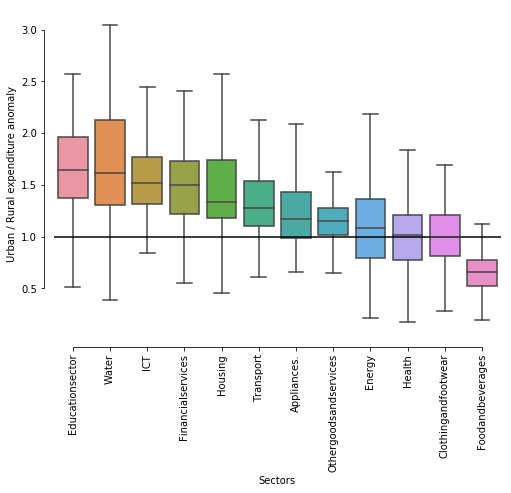

In [86]:
a4_dims = (8, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)



# Find the order
my_order = ["Educationsector","Water","ICT","Financialservices","Housing",
            "Transport","Appliances.",
            "Othergoodsandservices",
            "Energy","Health","Clothingandfootwear","Foodandbeverages"]

#sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
g = sns.boxplot(x="sector", y="gap_UtoR_prc",
            data=gap_UtoR,showfliers=False, order=my_order)
sns.despine(offset=10, trim=True)
plt.axhline(1, color='black')
g.set(xlabel='Sectors', ylabel='Urban / Rural expenditure anomaly')

#g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.setp(g.get_xticklabels(), rotation=90)

